# Creating a GeoDataFrame from a DataFrame with coordinates

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

# some settings for displaying Pandas results
# pd.set_option('display.width', 2000)
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.precision', 4)
# pd.set_option('display.max_colwidth', -1)

In [2]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})
df

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


In [3]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
gdf

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


In [4]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head(20)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997033076265 49.21498078062912,..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819135928291 41.30864166926936,..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,(POLYGON ((141.0002104025918 -2.60015105551566...
8,260580739,Asia,Indonesia,IDN,3028000.0,(POLYGON ((141.0002104025918 -2.60015105551566...
9,44293293,South America,Argentina,ARG,879400.0,(POLYGON ((-68.63401022758323 -52.636370458874...


In [5]:
world.query("name == 'India'")

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
98,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.32711388549004 28.26158274994634,..."


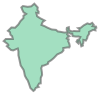

In [6]:
world.query("name == 'India'")["geometry"].loc[98]

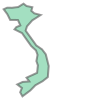

In [7]:
world.query("name == 'Vietnam'")["geometry"].loc[94]

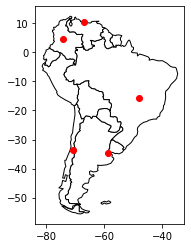

In [8]:
# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

# Plotting with Geoplot and GeoPandas

In [9]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [24]:
import geopandas

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
df.head(20)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997033076265 49.21498078062912,..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819135928291 41.30864166926936,..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,(POLYGON ((141.0002104025918 -2.60015105551566...
8,260580739,Asia,Indonesia,IDN,3028000.0,(POLYGON ((141.0002104025918 -2.60015105551566...
9,44293293,South America,Argentina,ARG,879400.0,(POLYGON ((-68.63401022758323 -52.636370458874...


In [11]:
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']
df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_pp
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",0.009093
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...,0.002791
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...,0.001503
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974...",0.046991
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49....",0.056823


In [12]:
boroughs = geopandas.read_file(geopandas.datasets.get_path('nybb')).to_crs(epsg='4326')
boroughs

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((-74.05050806403247 40.5664220341608...
1,4,Queens,896344.047763,3.045213e+09,(POLYGON ((-73.83668274106707 40.5949466970158...
2,3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((-73.86706149472118 40.5820879767934...
3,1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((-74.01092841268031 40.6844914725429...
4,2,Bronx,464392.991824,1.186925e+09,(POLYGON ((-73.89680883223774 40.7958084451597...


In [13]:
injurious_collisions = geopandas.read_file(
    "https://github.com/ResidentMario/geoplot-data/raw/master/nyc-injurious-collisions.geojson")
injurious_collisions.head(10)

,id,NUMBER OF PERSONS INJURED,BOROUGH,geometry
0,11,1,BROOKLYN,POINT (-73.94268479999999 40.676495)
1,21,1,MANHATTAN,POINT (-74.0083444 40.7213228)
2,27,1,BROOKLYN,POINT (-73.9707643 40.6876384)
3,28,1,BRONX,POINT (-73.83874250000002 40.8812664)
4,33,1,BROOKLYN,POINT (-73.98872990000002 40.5930014)
5,35,1,QUEENS,POINT (-73.78568609999998 40.707935)
6,38,1,MANHATTAN,POINT (-73.9574126 40.765868)
7,47,2,BRONX,POINT (-73.90674820000002 40.8235818)
8,65,3,STATEN ISLAND,POINT (-74.0879477 40.6103181)
9,77,1,BROOKLYN,POINT (-73.9494832 40.6968068)


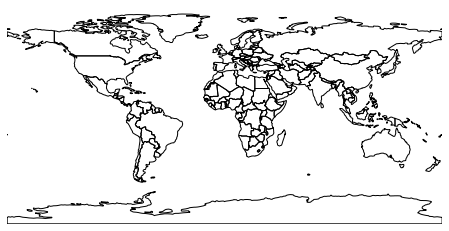

In [14]:
import geoplot

geoplot.polyplot(df, figsize=(8, 4))


/usr/local/anaconda3/envs/cv_fundamental/lib/python3.7/site-packages/geoplot/geoplot.py:620: UserWarning: Plot extent lies outside of the Orthographic projection's viewport. Defaulting to global extent.
  'Plot extent lies outside of the Orthographic projection\'s '


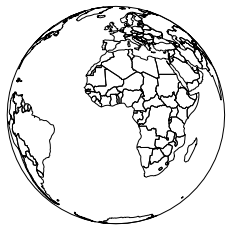

In [15]:
import geoplot.crs as gcrs
ax = geoplot.polyplot(df, projection=gcrs.Orthographic(), figsize=(8, 4))
ax.set_global()
ax.outline_patch.set_visible(True)


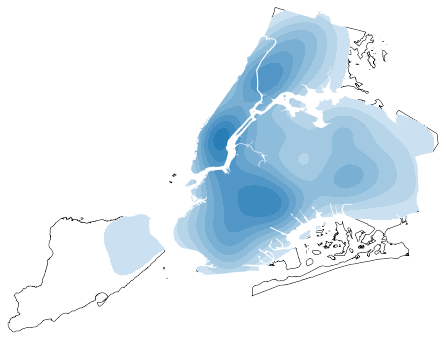

In [16]:
ax = geoplot.kdeplot(injurious_collisions.sample(1000),
                     shade=True, shade_lowest=False,
                     clip=boroughs.geometry)
geoplot.polyplot(boroughs, ax=ax)


# Adding a background map to plots

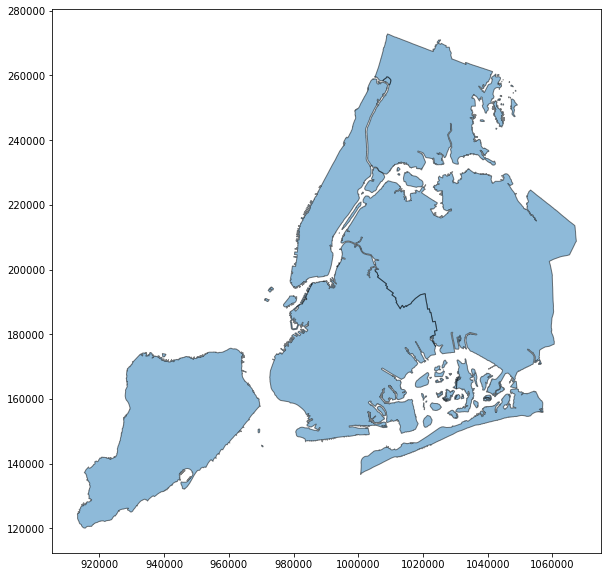

In [17]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')


In [18]:
df.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...
1,4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...
2,3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...
3,1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...


In [19]:
# Web map tiles are typically provided in Web Mercator (EPSG 3857), 
# so we need to make sure to convert our data first to the same CRS 
# to combine our polygons and background tiles in the same map
df = df.to_crs(epsg=3857)
df.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((-8243264.850671292 4948597.83631663...
1,4,Queens,896344.047763,3.045213e+09,(POLYGON ((-8219461.924600076 4952778.73177298...
2,3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((-8222843.671987788 4950893.79239433...
3,1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((-8238858.864036995 4965915.02425578...
4,2,Bronx,464392.991824,1.186925e+09,(POLYGON ((-8226155.130452585 4982269.94910598...


In [20]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

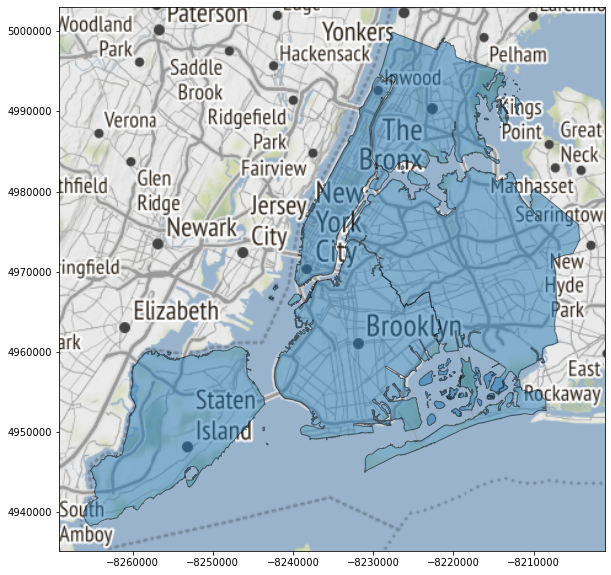

In [21]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=10)

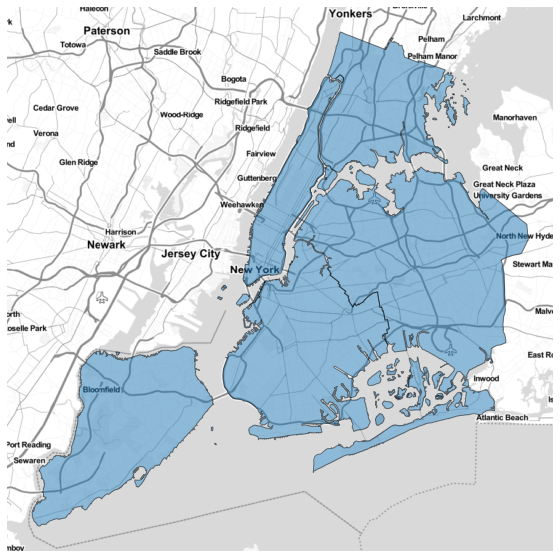

In [22]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=11, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()
